# Robotics Assessment 2

## Student Info

**Student ID Number:** 201663463<br>
**Name:** Haseeb Akbar<br>
**Email:** od21h2a@leeds.ac.uk


###  Summary and Introduction (3) 

**We have been provided with a robot named TurtleBot, our task is to navigate the robot in a given 3D environment.**
- The environment consists of a starting position and multiple goals.
- The goals are represented by white pillars.
- We must reach a goal without hitting a wall.
 
**The robot must reach any one of the goals without colliding with obstacles.**
- Obstacles in this environment are the walls.
    
**We need to develop three distinct trainable robot navigation models for this task:**
- **Tabular method:** A simple model that uses a table to store and update information.
- **Linear function approximation model:** A model that uses a linear combination of features to represent the value function.
- **Non-linear function approximation model:** A model that utilizes a non-linear representation of the value function, such as a neural network.

**Robot World 3D World**

We are using **Gazebo** to simulate the environment.
This environment features **four** perimeter walls enclosing the space. Within the area, there are **five** horizontal walls and **three** vertical walls, all placed at **fixed** positions. 
You can see the 3D world below.

In [27]:
from IPython.display import Image

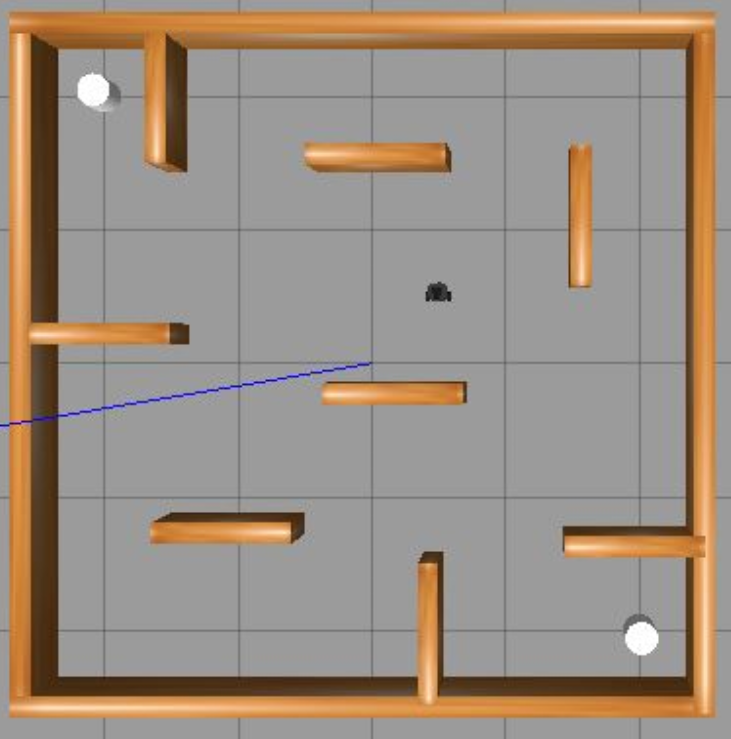

In [28]:
Image(filename='./world.png')

**TurtleBot3** 

For this task we are using the **TurtleBot3** for the robot.
TurtleBot3 is a third-generation open-source robot platform from ROS.
It includes various sensors and actuators that will enable us to interact with the environment.


In [29]:
Image(filename='./turtlebot3.png')

### Understanding the environment 

<span style="color:red">**Note:** This section is not marked on the assessment, It was more for learning on how to tackle the assessment and show you my thought process.</span>


**Robot World 2D World**

In this scenario, since we are working with the **TurtleBot3**, which is a **ground-based** robot, and **not** a **drone**, there is no need to consider aerial navigation. When observing the robot's movements from a bird's-eye view, it becomes evident that the robot can freely navigate in the **X** and **Y** dimensions.

As a result, we can disregard the **Z-axis**, simplifying our problem and allowing us to focus on effective navigation in a **two-dimensional** plane.

**Note:** In this example I don't consider **rotation**, the robot can only take four steps.

**Robot's movement for four actions**

- up 
- down
- left
- right

#### Mapping of the environment into a 2D World

In the cell below you can see there are **three** dictionaries called **walls**, **robot** and **goals**.<br> 
In Gazebo, each of the objects are given an **X**, **Y** and **Z** Position.
We will ignore Z as we are only considering **2D** planes.

Example: **Robot** (Details got from Gazebo)
- Position **Y**: -0.500048
- Position **X**: 0.50017
- Scale **Height**: 0.14
- Scale **Width**: 0.14

To find the robot start **x** position and end **x** position, we would add and subtract by width/2. 
We divide by 2, becuase Gazebo is giving the centre of the object.

<br>
$right\ x = 0.50017 + \frac{0.14}{2} = 0.57017$ 
<br>

$left\ x = 0.50017 - \frac{0.14}{2} = 0.43017$

Following similar steps for y cooridnates.

```robot = {"Robot":{"left_x": 0.43017, "right_x":0.57017 , "bottom_y": -0.570048, "top_y": -0.430048}}```

I will now repeat the same for all remaining obstacles.


In [14]:
walls = {
       "Wall_Top": {"left_x": 2.5, "right_x": -2.5, "bottom_y": -2.35, "top_y": -2.5},
       "Wall_Bottom": {"left_x": 2.5, "right_x": -2.5, "bottom_y": 2.5, "top_y": 2.35},
       "Wall_Right": {"left_x": 2.5, "right_x": 2.35, "bottom_y": 2.5, "top_y": -2.5},
       "Wall_Left": {"left_x": -2.5, "right_x": -2.35, "bottom_y": 2.5, "top_y": -2.5},
        ## Verticals
       "Wall_11": {"left_x": -1.392, "right_x": -1.542, "bottom_y": -1.437, "top_y": -2.437},
       "Wall_7": {"left_x": 1.623, "right_x": 1.473, "bottom_y": -0.564, "top_y": -1.564},
       "Wall_19": {"left_x": 0.5382, "right_x": 0.3882, "bottom_y": 2.41128, "top_y": 1.41128},
       ## Horizontals
       "Wall_9":{"left_x": 0.592, "right_x": -0.408, "bottom_y": -1.427, "top_y": -1.577},
       "Wall_13":{"left_x": -1.36, "right_x": -2.36, "bottom_y": -0.145, "top_y": -0.295},
       "Wall_21":{"left_x": 0.715, "right_x": -0.285, "bottom_y": 0.279, "top_y": 0.129},
       "Wall_15":{"left_x": -0.502, "right_x": -1.502, "bottom_y": 1.27, "top_y": 1.12},
       "Wall_17":{"left_x": 2.43, "right_x": 1.43, "bottom_y": 1.363, "top_y": 1.213},
}

robot = {
       "Robot":{"left_x": 0.43017, "right_x":0.57017 , "bottom_y": -0.570048, "top_y": -0.430048},
}

goals = {
    "Goal1":{"left_x": -2.125, "right_x":-1.875, "bottom_y": -2.125, "top_y": -1.875},
    "Goal2":{"left_x": 1.875, "right_x":2.125, "bottom_y": 1.875, "top_y": 2.125},
}

In [15]:
import matplotlib.pyplot as plt ## For plotting of the map

**2D World mapped**

Please run the code block below the see the 2d mapped world view.
- The yellow dot in the center is the robot.
- The stars are the goals which we need to reach.
- Anything else is an obstacle or wall

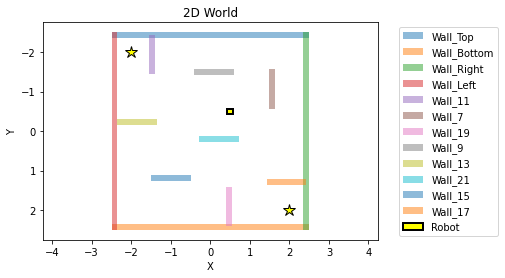

In [16]:
fig, ax = plt.subplots()

# Draw the walls
for wall, coords in walls.items():
    ax.fill([coords["left_x"], coords["right_x"], coords["right_x"], coords["left_x"]],
            [coords["bottom_y"], coords["bottom_y"], coords["top_y"], coords["top_y"]],
            label=wall, alpha=0.5)

# Draw the robot
for r, robot_coords in robot.items():
    ax.fill([robot_coords["left_x"], robot_coords["right_x"], robot_coords["right_x"], robot_coords["left_x"]],
            [robot_coords["bottom_y"], robot_coords["bottom_y"], robot_coords["top_y"], robot_coords["top_y"]],
            label=r, alpha=1, color="yellow", linewidth=2, linestyle="-", edgecolor="black")
    
# Draw the goals
for g, goal_coords in goals.items():
    ax.plot((goal_coords["left_x"] + goal_coords["right_x"])/2, (goal_coords["bottom_y"] + goal_coords["top_y"])/2,
            marker="*", markersize=12, markerfacecolor="yellow", markeredgecolor="black")
    
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D World")
plt.axis("equal")

# Invert the y-axis
ax.invert_yaxis()

plt.show()

**2D World mapped into grids**

Please run the code block below the see the 2d mapped world view.
- You can now see each grid is the size of the robot
- In this case each grid  is 0.14 * 0.14

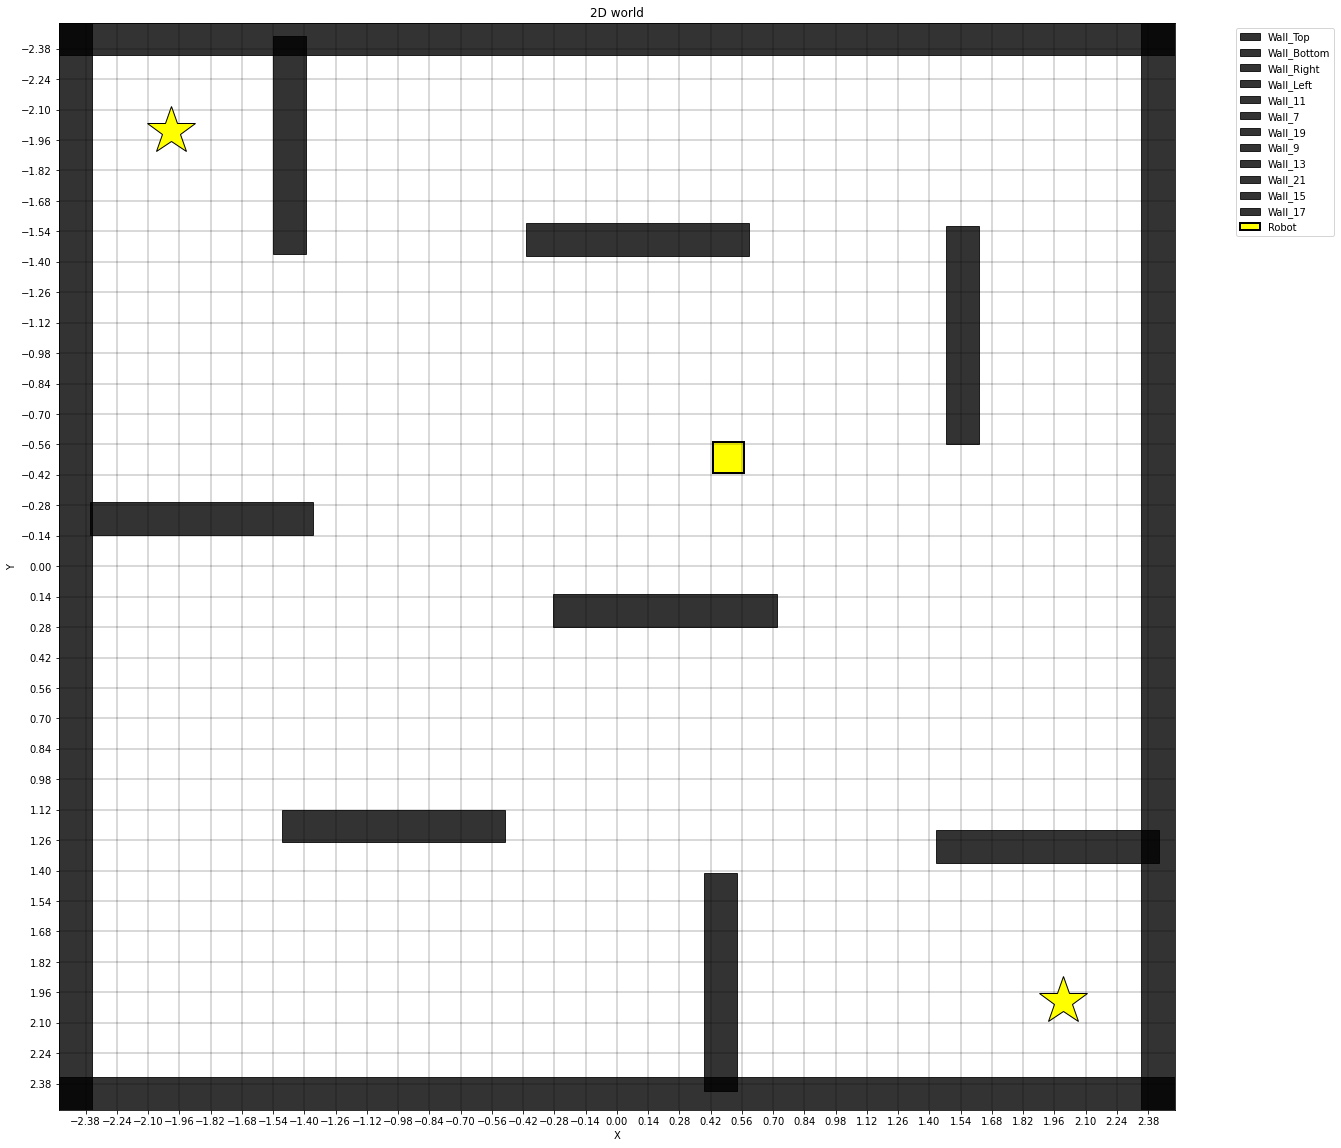

In [17]:
# Define grid parameters
grid_size = 0.14
x_min, x_max = -2.5, 2.5
y_min, y_max = -2.5, 2.5
x_ticks = [i*grid_size for i in range(int(x_min/grid_size), int(x_max/grid_size)+1)]
y_ticks = [i*grid_size for i in range(int(y_min/grid_size), int(y_max/grid_size)+1)]

fig, ax = plt.subplots(figsize=(20, 20))

# Draw the grid
for x in x_ticks:
    ax.axvline(x, linestyle='-', color='black', alpha=0.2)
for y in y_ticks:
    ax.axhline(y, linestyle='-', color='black', alpha=0.2)

# Draw the walls
for wall, coords in walls.items():
    ax.fill([coords["left_x"], coords["right_x"], coords["right_x"], coords["left_x"]],
            [coords["bottom_y"], coords["bottom_y"], coords["top_y"], coords["top_y"]],
            label=wall, alpha=0.8, color="black")
    
# Draw the robot
for r, robot_coords in robot.items():
    ax.fill([robot_coords["left_x"], robot_coords["right_x"], robot_coords["right_x"], robot_coords["left_x"]],
            [robot_coords["bottom_y"], robot_coords["bottom_y"], robot_coords["top_y"], robot_coords["top_y"]],
            label=r, alpha=1, color="yellow", linewidth=2, linestyle="-", edgecolor="black")
    
# Draw the goals
for g, goal_coords in goals.items():
    ax.plot((goal_coords["left_x"] + goal_coords["right_x"])/2, (goal_coords["bottom_y"] + goal_coords["top_y"])/2,
            marker="*", markersize=50, markerfacecolor="yellow", markeredgecolor="black")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D world")
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.axis([x_min, x_max, y_min, y_max])

# Invert the y-axis
ax.invert_yaxis()

plt.show()

**2D World mapped into a game**

- Below is the 2d grid as a game.
- You can see the red circle is at state 720.
- Which can be seen on the image called 2d_grid_states.png

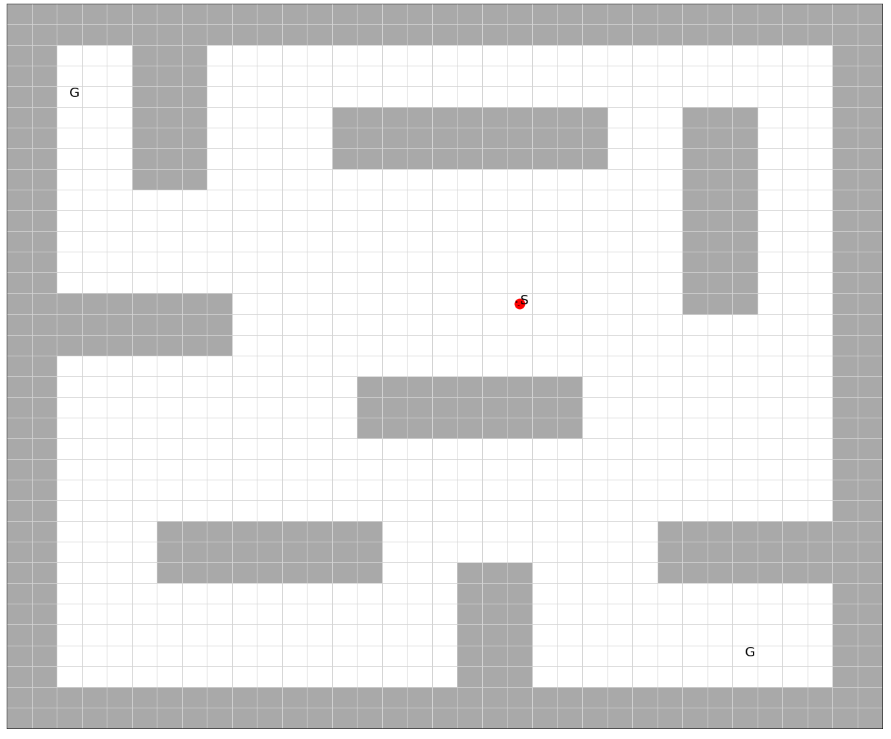

In [18]:
Image(filename='./2d_grid.png')

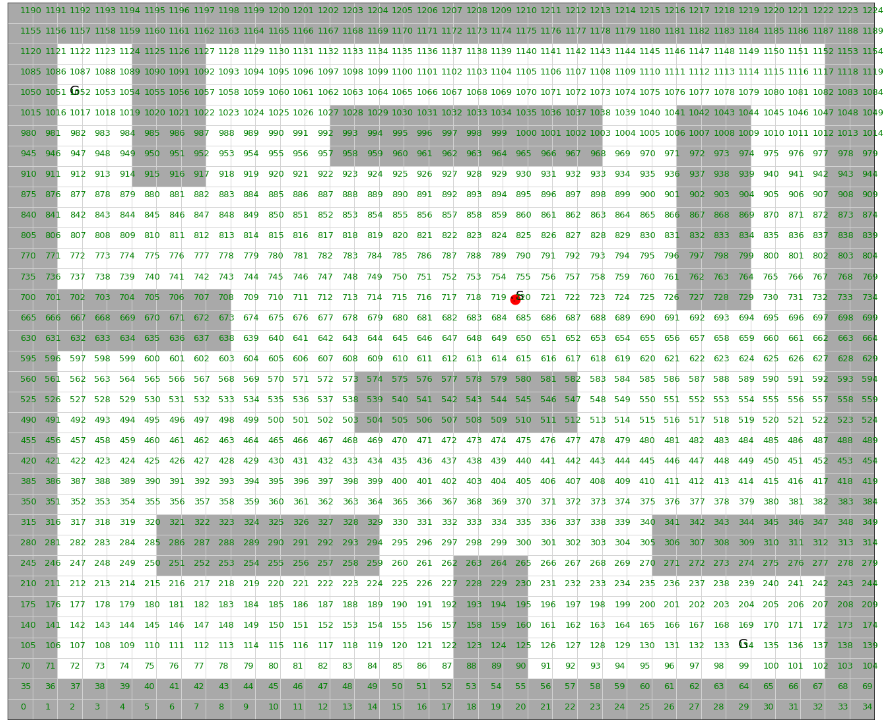

In [19]:
Image(filename='./2d_grid_states.png')

**Obstacles**

- The obstacles were mapped using states.
- You can see some obstacles took a width of 3 blocks instead of 2, this is so the robot doesn't accidently collide with a wall when turning.

In [20]:
rows = 35
cols = 35

obstacles = [
    *list(range(0, 2+(rows-1)*cols, cols)),
    *list(range(1, 2+(rows-1)*cols, cols)),
    *list(range(34, -2+(rows+1)*cols, cols)),
    *list(range(33, -2+(rows+1)*cols, cols)),
    *list(range(0, 34)),
    *list(range(35, 69)),
    *list(range(1190, 1224)),
    *list(range(1155, 1189)),
    *list(range(630, 639)),
    *list(range(665, 674)),
    *list(range(700, 709)),
    *list(range(1028, 1039)),
    *list(range(993, 1004)),
    *list(range(958, 969)),
    *list(range(574, 583)),
    *list(range(539, 548)),
    *list(range(504, 513)),
    *list(range(251, 260)),
    *list(range(286, 295)),
    *list(range(321, 330)),
    *list(range(271, 279)),
    *list(range(306, 314)),
    *list(range(341, 349)),
    *list(range(915, 2+(rows-1)*cols, cols)),
    *list(range(916, 2+(rows-1)*cols, cols)),
    *list(range(917, 2+(rows-1)*cols, cols)),
    *list(range(727, 1077, cols)),
    *list(range(728, 1078, cols)),
    *list(range(729, 1079, cols)),
    *list(range(20, 300, cols)),
    *list(range(19, 299, cols)),
    *list(range(18, 298, cols))
]

#### Pretest

- Initially I used the sarsa algorthim which will be explained later in this report.
- Below were the hyper paramters used
- **α**=0.9, **episodes**=100, **seed**=11
- α (alpha) is the learning rate 0.9 means the learning rate is set to 0.9, indicating that 90% of the new value is considered while updating the Q-value.
- An episode in reinforcement learning is a sequence of steps taken by the agent until a terminal state is reached.
- A seed in the context of reinforcement learning usually refers to a random seed used for initialising the random number generator. The seed ensures reproducibility of results when training or testing the agent.


**Episode results**
- Below you can see initially the steps oscillated very highly 
- even so that it took 10000 steps to the reach the goal 
- you can see eventually steps decreased massively as episodes went on.

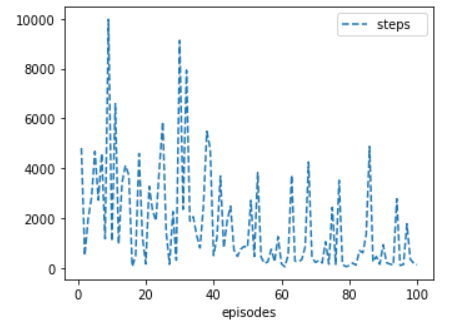

In [15]:
Image(filename='./steps.png')

**Robot Result**
- As I didn't want to wait for the robot to run all episodes. I ran the 99 episodes on the 2d grid game above.
- There are 1225 states, which means it would take a long time for the robot to complete the grid at this resolution.
- Once the 100 episode was reached, to publish messages to the robot instead of playing the game and this was the result.
- The video was spead up 20 times, as it took 13 mins to get from start to goal.
- From this I learnt reduce the states, it will be less accurate but will save a massive amount of time.
- On the video below there was as slight overshoot at the end, this is due to me using a linear velocity of 0.14 and running for one second. 
- Again this was purely for learning before I tackled the tasks.

In [2]:
from IPython.display import Video
Video('./sarasa_odom_cw.mp4')

### ENV Class (10)
#### Creating a suitable Env class that communicates with the provided environment and isolates the ROS requirements from the RL solution (10)

Imports needed before running the env class

In [ ]:
import rospy as ros
import os
from sensor_msgs.msg import LaserScan
import numpy as np
from numpy import Inf
from geometry_msgs.msg import Twist, Pose
from nav_msgs.msg import Odometry
from std_srvs.srv import Empty
from gazebo_msgs.srv import SpawnModel
import random
from math import atan2, pi

In [18]:
%matplotlib inline

In [ ]:
import rospy as ros
from sensor_msgs.msg import LaserScan
import numpy as np
from numpy import Inf
from geometry_msgs.msg import Twist
from nav_msgs.msg  import Odometry
from std_srvs.srv import Empty
import random
from math import pi
import time
import math

In [20]:
# global hyperparamter how many areas full cricle divided
θres = 4
# global hyperparamter how times publisher publisehs
hz = 5
# 5 is the frequency of scan (we can reduce here to reduce the overhead but responsiveness will degrade)

In [ ]:
class Env:
    
    def __init__(self, xdim=5, ydim=5, hz=5,  
                 
                 xgoal1min=-1.7, xgoal1max=-1.2, #The goals we wish to reach 
                 ygoal1min=-2.2, ygoal1max=-1.6, #split by boundary 
                 
                 xgoal2min=1.7, xgoal2max=2.2, 
                 ygoal2min=1.1, ygoal2max=1.7,
                 
                 x= -0.000021, y = -0.000021, θ=0,
                 speed=0.46, θspeed=0.14,
                 resol=0.3, θresol=2*pi/θres,
                 range_min=0.30,

                 obstacles=False,
                 isScan=True
                 visual=False):
        
        ros.init_node('RoboEnv2')
        ros.loginfo('Robot Environment node has been created')
        
        if isScan:
            self.sub_scan = ros.Subscriber('/scan', LaserScan, self.scan, queue_size=None)
        
        self.sub_odom = ros.Subscriber('/odom', Odometry, self.odom, queue_size=1)
        self.pub_robot = ros.Publisher('/cmd_vel', Twist, queue_size=1)
        
        self.Vstar = None # for compatibility
        
        #visual
        self.visual = visual
        
        # coordinates of the goal must be changed to match the given environment
        self.xgoal1min = xgoal1min
        self.xgoal1max = xgoal1max
        
        self.ygoal1min = ygoal1min
        self.ygoal1max = ygoal1max
        
        self.xgoal2min = xgoal2min
        self.xgoal2max = xgoal2max
        
        self.ygoal2min = ygoal2min
        self.ygoal2max = ygoal2max
        
        #size of env         
        self.xdim = xdim
        self.ydim = ydim
        
                 
        # $ rostopic hz /scan, rostopic hz /odom
        self.hz = hz  # frequency of scan
        self.rate = ros.Rate(self.hz)
        
        self.speed = speed    # linear speed, change as you see fit
        self.θspeed = θspeed # angular speed, change as you see fi
        
        self.resol = round(resol,2)
        self.θresol = round(θresol,2)
        
        self.cols = int(self.xdim//self.resol) 
        self.rows = int(self.ydim//self.resol)
        self.orts = int(2*pi//self.θresol)    
        
        self.x = x
        self.y = y
        self.θ = θ
    
        self.nC = self.rows*self.cols           # Grid size
        self.nS = self.rows*self.cols*self.orts # State space size
        self.nA = 4
        
        self.range_max = 3.5
        self.range_min = 0.3  # change as you see fit
        
        print('Grid  size = ', self.rows,'x', self.cols,'=', self.nC)
        print('State size = ', self.rows,'x', self.cols, 'x', self.orts,'=',self.nS)
        
        self.robot = Twist()
        self.crashes = []
        self.crash = 0;
        
        self.obstacles = obstacles
        self.isScan = isScan

    # change as you see fit
    def scan(self, scans):
        scans = np.array(scans.ranges)
        scans[scans==Inf] = self.range_max
        self.scans = scans

    # change the reward to produce a suitable policy
    def reward(self):
        reward = -10
        done = False
        
        if self.xgoal1max >= self.x >= self.xgoal1min and self.ygoal1max >= self.y >= self.ygoal1min: 
            reward =  10000
            done = True
            self.crashes.append(self.crash) 
            self.crash = 0
            
        if self.xgoal2max >= self.x >= self.xgoal2min and self.ygoal2max >= self.y >= self.ygoal2min: 
            reward =  10000
            done = True
            self.crashes.append(self.crash) 
            self.crash = 0
            
        if self.isScan:    
            if self.scans[:3].min() < self.range_min or self.scans[-3:].min() < self.range_min:
                reward =  -10000 
                self.crash +=1
                done = True
        
        if(self.obstacle):
        # Check if the robot's position is touching a wall
            robot_x = self.current_position[0]
            robot_y = self.current_position[1]

            for wall_name, wall_coordinates in walls.items():
                if (wall_coordinates["left_x"] >= robot_x >= wall_coordinates["right_x"] and wall_coordinates["bottom_y"] <= robot_y <= wall_coordinates["top_y"]):
                    reward = -10000
                    self.crash += 1
                    done = True
        
        return reward, done
    
    # change as you see fit
    def odom(self, odoms):
        self.x = round(odoms.pose.pose.position.x, 1)   
        self.y = round(odoms.pose.pose.position.y, 1) 
        
        self.z = round(odoms.pose.pose.orientation.z, 3)
        self.w = round(odoms.pose.pose.orientation.w, 3)
        self.current_yaw = math.atan2(2 * (self.w * self.z), 1 - 2 * (self.z**2))

        self.rate.sleep() 
    
    # change this to generate a suitable state representation
    def s_(self):
        x_index = int((self.x + self.xdim/2) // self.resol)
        y_index = int((self.y + self.ydim/2) // self.resol)
        θ_index = int((self.θ + 2 * pi) % (2 * pi) // self.θresol)
        
        state = x_index + y_index * self.cols + θ_index * self.cols * self.rows
        return state
    
    def reset(self):
#        reset_world service
        try:    ros.ServiceProxy('/gazebo/reset_world', Empty).call()
        except: print('could not reset world')
        self.rate.sleep()
        self.pos = 'down'
        return self.s_()

    def step(self, a):
        
        # commented out for testing
        if a==1:
            self.rotate('down')
        if a==2:
            self.rotate('right')
        if a==3:
            self.rotate("up")
        if a==4:
            self.rotate("left")
        
        self.forward()
            
        self.pub_robot.publish(self.robot)
        self.rate.sleep()
            
        self.s = self.s_() # get the stat
        self.r, self.done = self.reward()
        return self.s, self.r, self.done, {}
    
    def nodeslist(self):
        nodes = os.popen('rosnode list').readlines()
        for i in range(len(nodes)):
            nodes[i] = nodes[i].replace('\n', '')
            print(nodes[i])
    
    # for compatibility, no need to change
    def render(self, **kw):
        pass
    
    def forward(self):
        self.robot.linear.x  = self.speed
        self.robot.angular.z =  0
        self.pub_robot.publish(self.robot)
        time.sleep(2.5)
        self.rate.sleep()
        self.stop()
    def stop(self):
        self.robot.linear.x = 0
        self.robot.angular.z = 0
        self.pub_robot.publish(self.robot)
        self.rate.sleep()
        
    
    def normalize_angle(self, angle):
        while angle > math.pi:
            angle -= 2 * math.pi
        while angle < -math.pi:
            angle += 2 * math.pi
        return angle

    def rotate(self, direction):
        if direction == 'down':
            target_yaw = 0
        elif direction == 'left':
            target_yaw = math.radians(90)
        elif direction == 'up':
            target_yaw = math.radians(180)
        elif direction == 'right':
            target_yaw = math.radians(270)
        else:
            raise ValueError('Invalid direction, must be "down", "left", "up", or "right".')

        angle_tolerance = 0.02  # Adjust this value based on the required precision
        angular_velocity = self.θspeed # rad/s, set this to the desired angular velocity

        target_yaw = self.normalize_angle(target_yaw)
        current_yaw_normalized = self.normalize_angle(self.current_yaw)

        while abs(current_yaw_normalized - target_yaw) > angle_tolerance:
            clockwise_angle_diff = (current_yaw_normalized - target_yaw) % (2 * math.pi)
            counterclockwise_angle_diff = (target_yaw - current_yaw_normalized) % (2 * math.pi)

            if clockwise_angle_diff < counterclockwise_angle_diff:
                self.robot.angular.z = -angular_velocity  # Rotate clockwise
            else:
                self.robot.angular.z = angular_velocity  # Rotate counterclockwise

            self.pub_robot.publish(self.robot)
            self.rate.sleep()
            current_yaw_normalized = self.normalize_angle(self.current_yaw)

        self.robot.angular.z = 0  # Stop rotating

**Setting of goal**

- I use xgoal1Min, xgoal1max, same for y
- I don't want a fixed point where the robot would stop, I wanted boundaries.
- You can see the boundaries in the example below

In [ ]:
### Do not run this codeblock
xgoal1min=-1.7, xgoal1max=-1.2, #The goals we wish to reach 
ygoal1min=-2.2, ygoal1max=-1.6, #split by boundary 
                 
xgoal2min=1.7, xgoal2max=2.2, 
ygoal2min=1.1, ygoal2max=1.7,

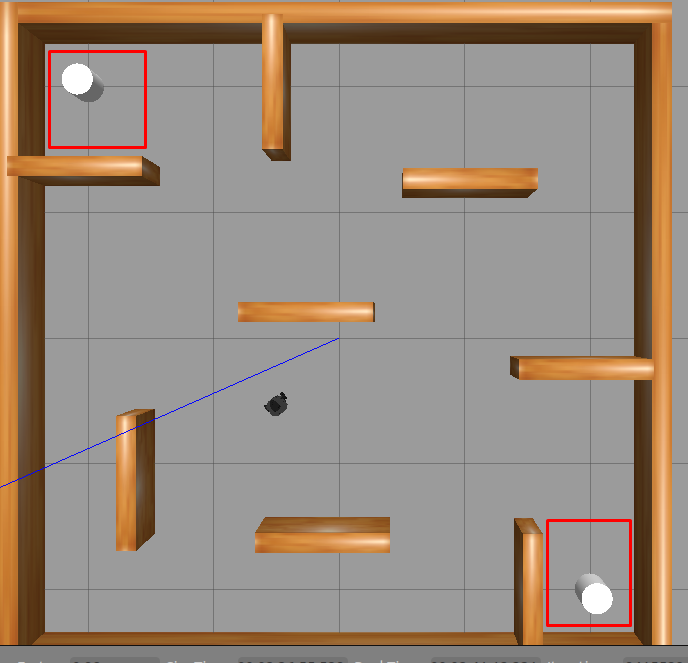

In [22]:
Image(filename='./Boundaries.png')

**Robot coordiantes**

- Below you can see default values for x, y and the "yaw" or angle are set.
- These are set to the robots inital position in the env.
- These can be seen in Gazebo, or the launch file.


In [ ]:
x= -0.000021, y = -0.000021, θ=0,

**Speed**
- Is used to control how fast the robot goes "forward" and how the robot the rotates.
- These can be adjusted.
- Note: If you increase too drastically, you will have less precision in how you move. Which may mean you might hit a wall or overshoot on the rotation.

In [ ]:
speed=0.46, θspeed=0.14,

**States/Grids**

- resol/θresol are used to cacluate which state the robot currently occupies



In [ ]:
resol=0.3, θresol=2*pi/θres,

**Useful bits**
- range_min is the minumum distance from a wall that robot will take
- obstacles set to false, so don't always have to rely on providing obstacles
- isScan will make use of the scan or not, this makes it easier to use for part 2 of assessment without modifiying the env.

In [ ]:
range_min=0.30, obstacles=False, isScan=True

**States**
- Below you can see I have set the states to four
- The reason for four states, is because I wanted the robot to only go left, right, up, down.
- I wanted a more fail fast approach.
- If instead of movement I kept rotating. This made the robot constantly spin and waste steps.
- So yes less precision but fail fast approach.

In [ ]:
self.nA = 4

In [24]:
Image(filename='./robot_pos.png')

**Quadrants**

- If we split a circle equally in four parts we can say the circle has four quadrants as shown below.
- In my case, if I want to go right this would go right.
- If you look at the rotate function in the env class you can see the four states.
- So if I want to move right, my target yaw would be target_yaw = math.radians(270). This would mean the robot would rotate till hits that target_yaw and then move one step forward.
- As I always wanted the robot to take steps.

In [25]:
Image(filename='./quadrants.png')

## Robot model 1: Tabular Solution

### Use a tabular RL method (2)
For model 1 we have to use a Tabular solution. This is a discrete table-based approach to represent and store state action valuions. Allowing agents to learn optimal policies by updating their values itervatively.   

**Example**: You have a game board where each space has a score. In this game the robot moves around the board and learns which spaces give the best score. The robot remembers these scores in a table and uses them to make better moves in the future.

There are many different methods in reinforcement learning, for example
- Q-Learning
- Sarsa 
- Double Q-Learning

In this case I will be using Sarsa.

Sarsa is a reinforcement learning algorithm that learns how to make decisions by considering the current state, action, reward, next state, and next action, which is useful for a robot moving in x and y directions to reach a goal because it helps the robot adapt its behavior based on its experiences and avoid obstacles more effectively.

**Note:** The code block for the use of Sarsa will be shown below.

### Correctly divide the environment into a grid and use odometry only for state representation (2)

**Setting the environment**

In [ ]:
env = ENV(
    xdim=10,
    ydim=10,
    speed=0.22,
    θspeed=0.3,
    hz=hz,
    resol=1,
    θresol=(2 * pi / θres),
    range_min=0.38,
    obstacles=obstacles,
    isScan=False,
)

- x was chosen as 10 as I broke the world down into 10 "half" sqaures
- y was chosen as 10 as I broke the world down into 10 "half" sqaures
- speed was chosen as 0.22 as going at 0.22 seconds for 2.5 seconds resulting in going half a square. 
- The reason for wanting to go half squares, was going a whole square resulting in crashes as going too far.
- Any less than half a square and this resulted in too many states and robot too long to complete course.
- resol was one as didn't want to split the world any further. 
- range min was distance from wall. In this case scan wasn't used as for part one we only want to use odometry.
- obstacles are walls which are defined previously

In [26]:
Image(filename='./ydim.png')

In [27]:
Image(filename='./xdim.png')

#### No of states/Grid
- 10 * 10 is equal to 100 for grid states
- 10 * 10 * 4 = 400 the reason for 400 is due to the four quadrants of the circle

### Use a suitable reward function (2)

- For every step taken, a -10 reward is given to discourage excessive wandering and encourage progression towards the goal.
- If the robot is within the goal area, it receives a 10,000 reward, as an extreme incentive is desired to always yield a positive result, regardless of the number of steps.
- Should the robot hit a wall, this is deemed a failure and the episode is completed; the robot is penalised with a -10,000 reward.
- The only risk associated with this approach is if the robot never finds a goal, it may perceive hitting the wall in one step as the greatest reward (-10,000) compared to taking multiple steps and hitting a wall.

In [ ]:
# DO NOT RUN
    def reward(self):
        reward = -10
        done = False
        
        if self.xgoal1max >= self.x >= self.xgoal1min and self.ygoal1max >= self.y >= self.ygoal1min: 
            reward =  10000
            done = True
            self.crashes.append(self.crash) 
            self.crash = 0
            
        if self.xgoal2max >= self.x >= self.xgoal2min and self.ygoal2max >= self.y >= self.ygoal2min: 
            reward =  10000
            done = True
            self.crashes.append(self.crash) 
            self.crash = 0
    ## Not used in part one
        if self.isScan:    
            if self.scans[:3].min() < self.range_min or self.scans[-3:].min() < self.range_min:
                reward =  -10000 
                self.crash +=1
                done = True
        
        if(self.obstacle):
        # Check if the robot's position is touching a wall
            robot_x = self.current_position[0]
            robot_y = self.current_position[1]

            for wall_name, wall_coordinates in walls.items():
                if (wall_coordinates["left_x"] >= robot_x >= wall_coordinates["right_x"] and wall_coordinates["bottom_y"] <= robot_y <= wall_coordinates["top_y"]):
                    reward = -10000
                    self.crash += 1
                    done = True
        
        return reward, done

### Parameters tuning and justification (2)

In [ ]:
import nbimporter
from Lesson5_TemporalDifferenceMethods import *

In [ ]:
sarsa = Sarsa(env=grides,α=0.4, episodes=1200, seed=8, **demoGame()).interact()

- Imported Sarsa from the provided notebook.
- The most crucial aspect for model convergence was to fail fast.
- Initially, the environment was divided into smaller squares, resulting in more states.
- Consequently, even completing one episode would take the robot over an hour.
- Another approach was to initiate a new episode after every crash, as the aim was to fail fast and completing an episode took too long.
- The only risk with this method was if the robot never found the goal, it might assume crashing into the nearest wall offered the best reward path.
- Since the robot had to rotate to an exact angle, a tolerance of 0.3 was set, and rotation speed was increased. If these values were lower, rotation would take too long. However, the primary issue encountered in this case was the robot oscillating.

**Below, two issues are highlighted**:

- Firstly, the robot rotates quite slowly. However, increasing the speed would cause it to miss the target angle, leading to oscillation.
- The second issue is that the robot oscillates even at its current speed. Increasing the tolerance was not an option, as it would result in the robot not following the same paths.

In [10]:
Video('./robot_problems.mp4')

- A value of 0.4 was selected to prevent learning too quickly, resulting in a balance of 40% new information and 60% old information. Since numerous crashes were expected initially, the aim was also to encourage the robot to explore.
- Longer steps were taken, and restarts occurred upon crashing into walls. 1,200 episodes were chosen, as it was anticipated that the robot would train quickly.


Below, you can observe the training progress while using the game world:

- In the first instance, when state values were increasing and smaller increments for movement were employed, it took the robot thousands of steps to reach the goal.
- In contrast, the second graph demonstrates that when larger steps were taken, resulting in fewer states to occupy, and failure occurred upon hitting a wall, the robot reached the goal in just 11 episodes and achieved it within 5 steps.

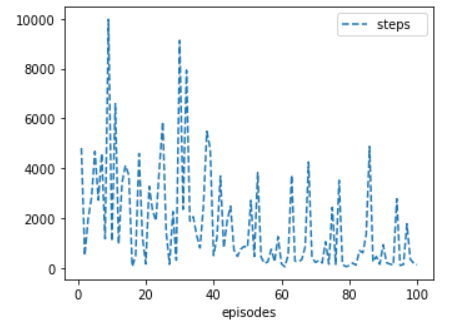

In [12]:
Image(filename='./steps.png')

In [13]:
Image(filename='./steps2.png')

### Learning plots, model’s success rate (2)

- By continuing exploration for 1,200 steps:
- The maximum steps taken to reach the goal or fail was limited to 70 steps.
- This significantly reduced the time required to train the model.
- After 400 episodes, the robot started achieving the goal with a very high success rate.
- This demonstrated the effectiveness of the 'fail fast' approach.
- Unfortunately, the exact number of times the robot failed (i.e., crashed) is unavailable due to a crash in the virtual machine during runtime.
- However, based on an educated guess, it can be seen that the success rate increased over time, surpassing 60% as more episodes were completed.

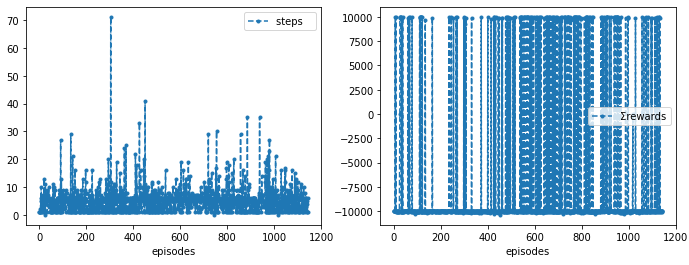

In [23]:
Image(filename='./steps3.png')

### Analysis of the results (2) 

- As episodes progressed, the robot increasingly reached the goal.
- One issue encountered was the tolerance angle being slightly too large, causing the robot to move at a slight angle.
- As illustrated below, the robot began to drift, meaning that even if the same steps were reproduced, there was a possibility that the robot might not reach the goal and instead hit the wall.
- A video showcasing the robot reaching the goal after 1,200 episodes is provided below.
- Impressively, the robot achieved the goal in just 8 steps.
- The only problem observed was the robot oscillating, i.e., trying to find the angle of tolerance when turning.

In [17]:
Video('./turn_issues.mp4')

In [20]:
Video('./1_goal.mp4')

##  Robot model 2: Linear function approximation solution

### Use a suitable representation for the states (5)

- One-hot encoding was used to represent the states as binary vectors The vector contains a 1 in the position corresponding to the specific category or state, and 0s in all other positions.

- Advtange is that allows machine learning algorithms which are based on linear models to better understand data. It elimantes any relationships between cateogries that might be misinterpreted by the algorthim, as each category is represented by a unique and orthogonal vector.

- One-hot encoding is being used to represent the states of the gridworld as feature vectors in the vGrid class, which inherits from the Grid class.

In [ ]:
## DO NOT RUN
class vGrid(Grid):
    def __init__(self, nF=None, **kw):
        super().__init__( **kw)
        # num of features to encode a state
        self.nF = nF if nF is not None else self.nS 
        self.S = None
        
    # vectorised state representation: one-hot encoding (1 component represents a state)
    def s_(self):
        φ = np.zeros(self.nF)
        φ[self.s] = 1 
        return φ

    def S_(self):
        if self.S is not None: return self.S
        # S is a *matrix* that represents the full state space, this is only needed for Grid visualisation
        sc = self.s  # store current state to be retrieved later
        for self.s in range(self.nS): 
            self.S = np.c_[self.S, self.s_()] if self.s else self.s_()
        self.s = sc 
        return self.S

- In the code above, the vGrid class has a method s_() that returns a one-hot encoded representation of the current state self.s. This method creates a zero vector of length self.nF (number of features), and sets the element at the index corresponding to the current state to 1.

#### **Examples**
#### Create an instance of vmaze with the desired parameters

In [ ]:
## Do not run
vm = vmaze(r=35, c=35, s0=720, goals=[1052, 134], style='maze')

#### Call the s_() method to get the one-hot encoded representation of the current state

In [ ]:
## Do not run
one_hot_encoded_state = vm.s_()
print("One-hot encoded current state:\n", one_hot_encoded_state)

#### Call the S_() method to get the one-hot encoded representation of the entire state space

In [ ]:
## Do not run
state_space_matrix = vm.S_()
print("One-hot encoded state space matrix:\n", state_space_matrix)

One-hot encoded current state:

 [0. 0. 0. ... 0. 0. 0.]
 
 
One-hot encoded state space matrix:

 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

- The outputs represent the one-hot encoded representations of the current state and the entire state space.

**One-hot encoded current state**:

- This is a 1D array where all elements are zeros, except for the one corresponding to the current state, which is 1. In this case, the index with the value 1 represents the current state (s0=720). The length of the array is equal to the number of states in the maze.

**One-hot encoded state space matrix**:

- This is a 2D array where each row represents a one-hot encoded state. The number of rows is equal to the number of states in the maze, and the number of columns is equal to the number of features (nF) used to represent a state. In this case, nF is equal to the number of states in the maze, so the state space matrix is a square matrix.

- Each row has only one element with the value 1, and all the other elements are 0. The position of the 1 in a row represents the state corresponding to that row. For example, the first row represents state 0, the second row represents state 1, and so on.

### Use a vectorised RL method with linear function approximation (5) 

In [ ]:
class trueSarsaλ(MDP()):
    def __init__(self, λ=.5, **kw):
        super().__init__(**kw)
        self.λ = λ
        self.step = self.step_an # for Sarsa we want to decide the next action in time step t
    
    def step0(self):
        self.Z = self.W*0
        self.qo = 0
    # ----------------------------------------🌖 online learning ----------------------------------------
    def online(self, s, rn,sn, done, a,an):
        
        α, γ, λ = self.α, self.γ, self.λ
        
        self.q = self.Q(s,a)
        self.qn= self.Q(sn,an)*(1-done)
        δ = rn + γ*self.qn - self.q
        self.Z[a] = λ*γ*self.Z[a] + (1-α*λ*γ*self.Z[a].dot(s))*s
        
        self.W[a] += α*(δ + self.q - self.qo )*self.Z[a] - α*(self.q - self.qo)*s
        self.qo = self.qn


- trueSarsaλ is a class that implements the True Online Sarsa(lambda) algorithm, which is an online, on-policy reinforcement learning method that uses function approximation to estimate the optimal action-value function.
- Linear function approximation is used to approximate the action-value function, where each state-action pair is represented by a feature vector.
- The algorithm maintains a weight vector W for each action, and uses these weight vectors to estimate the action-value function.
- At each time step, the algorithm updates the weight vector for the current action using the TD error and the eligibility trace, which is a vector that keeps track of the recent history of state-action pairs. The eligibility trace is updated using the TD error and the previous eligibility trace.
- The algorithm uses a step-size parameter α, a discount factor γ, and a trace-decay parameter λ to control the learning rate, the degree to which future rewards are discounted, and the degree to which the eligibility trace decays over time, respectively.
- The step0 method initializes the eligibility trace and the previous action-value estimate to zero.
- The online method implements the online learning step of the algorithm, which takes in the current state, reward, next state, done flag, current action, and next action, and updates the weight vector for the current action using the TD error and the eligibility trace.
- Overall, the algorithm uses linear function approximation to estimate the optimal action-value function, and updates the weight vectors for each action using the TD error and the eligibility trace at each time step.

#### About the class
- The class inherits from the MDP class, and it extends the functionality by implementing the True Online Sarsa(λ) algorithm. The key components of the implementation are the online method that updates the weights (W) and eligibility traces (Z) during each time step based on the observed state transition, reward, and chosen actions.

### Correctly uses odometry and laser scans for state representation (5)

- Update the env as follows to return a feature vector

In [ ]:
## Do not run this code block
def s_(self):
    # Get the index for the current x, y, and θ values
    x_index = int((self.x + self.xdim/2) // self.resol)
    y_index = int((self.y + self.ydim/2) // self.resol)
    θ_index = int((self.θ + 2 * pi) % (2 * pi) // self.θresol)
    
    # Concatenate the odometry and laser scans values to create the feature vector
    odom_feature = np.array([self.x, self.y, self.θ])
    scan_feature = self.scans[:180]  # Use the first 180 laser scan values as the feature
    feature_vector = np.concatenate((odom_feature, scan_feature))
    
    # Convert the feature vector to a one-hot encoded state
    state = np.zeros(self.nS)
    state[x_index + y_index * self.cols + θ_index * self.cols * self.rows] = 1
    return state

- In this updated s_() method, odom_feature is a numpy array that contains the current x, y, and θ values. scan_feature is also a numpy array that contains the first 180 laser scan values. These two arrays are then concatenated using the np.concatenate() function to create the feature vector feature_vector.

- Finally, feature_vector is converted to a one-hot encoded state in the same way as before, by setting the corresponding element of the state vector to 1. The resulting state vector is then returned.

### Use a suitable reward function (5)

**The reward function below**

- The reward function takes the current state and next state as input, allowing it to calculate rewards based on the environment's state representation rather than relying on odometry.

- The state_to_feature_vector method is used to convert the state representation into a feature vector, which is crucial for linear function approximation. This conversion enables the algorithm to work with a fixed set of features, making it easier to learn and generalize across different states.

- The function checks if the robot has reached either of the two goal locations (goal 1 or goal 2) by examining the state's 'x' and 'y' values. If the robot reaches a goal, it receives a reward of 10,000, and the episode is marked as done. This encourages the robot to find the shortest path to a goal.

- If the robot neither reaches a goal nor collides with obstacles or walls, it receives a small negative reward of -10. This encourages the robot to reach a goal quickly, as it tries to minimize the negative reward.

- The reward function outputs the reward, a boolean flag indicating whether the episode is done, the feature vector for the current state, and the feature vector for the next state. This output format allows the True SARSA algorithm to learn a linear function approximation of the state-action value function using the feature vectors.

In [ ]:
## Do not run
def reward(self, state, next_state):
    reward = -10
    done = False

    # Define feature vector
    feature_vector = self.state_to_feature_vector(state)

    # Check if robot reached goal 1
    if self.xgoal1max >= state['x'] >= self.xgoal1min and self.ygoal1max >= state['y'] >= self.ygoal1min:
        reward = 10000
        done = True
        self.crashes.append(self.crash)
        self.crash = 0

    # Check if robot reached goal 2
    if self.xgoal2max >= state['x'] >= self.xgoal2min and self.ygoal2max >= state['y'] >= self.ygoal2min:
        reward = 10000
        done = True
        self.crashes.append(self.crash)
        self.crash = 0

    # Check for collision with obstacle
    if self.isScan and (state['scans'][:3].min() < self.range_min or state['scans'][-3:].min() < self.range_min):
        reward = -10000
        self.crash += 1
        done = True

    # Check for collision with wall
    if self.obstacles:
        for wall_name, wall_coordinates in walls.items():
            if (wall_coordinates["left_x"] >= state['x'] >= wall_coordinates["right_x"] and wall_coordinates["bottom_y"] <= state['y'] <= wall_coordinates["top_y"]):
                reward = -10000
                self.crash += 1
                done = True

    # Define next feature vector
    next_feature_vector = self.state_to_feature_vector(next_state)

    return reward, done, feature_vector, next_feature_vector

### Parameters tuning and justification (5) 

- Approximately 70 episodes were used, as increasing the number of episodes improved performance by providing the agent with more opportunities to explore the environment. However, having too many episodes could lead to overshooting, among other issues. More episodes would have been attempted if time had not been a constraint.

- A λ value of 0.9 was employed. Increasing the λ value helped the robot look ahead and consider long-term goals. If the value was too small, the robot would rarely reach the goal, as it wouldn't look far enough ahead.

- A learning rate value of 0.4 was chosen. Initially, issues with convergence were encountered, but increasing the learning rate helped achieve the goal, and the value was fine-tuned accordingly.

- A low ε value of 0.1 was selected. The robot didn't need to explore the environment randomly due to the half steps taken and the fail-fast approach to reach the goal. The aim was for the robot to choose a higher Q-value and converge more quickly.


### Learning plots, model’s success rate (5)

- By continuing exploration for approx 70 episodes not 1200 like the last.
- The reason was due to lack of time.
- The maximum steps taken to reach the goal or fail was limited to 25 steps.
- This significantly reduced the time required to train the model.
- After 10 episodes, the robot started achieving the goal with a very high success rate.
- This demonstrated the effectiveness of the 'fail fast' approach.
- Approx from the 70 episodes it 10 were successes. 
- Meaning it had 1/7 chance of completing the goal with such little training. 

In [ ]:
Image('./true_sarsa.png')

### Analysis of the results (5) 

- Unfortunately, only about 70 episodes were run due to time constraints.
- As episodes progressed, specifically between 10 and 40, there were more successes and fewer crashes.
- One issue encountered was the tolerance angle; sometimes, when the robot attempted to repeat the same steps, it crashed instead of reaching the goal.
- A video of the robot reaching the goal is provided below. It takes more steps than the Sarsa method, due to less training.
- As a result, the robot performs a considerable amount of turning.
- The observable issue is the robot oscillating, i.e., trying to find the angle of tolerance when turning.

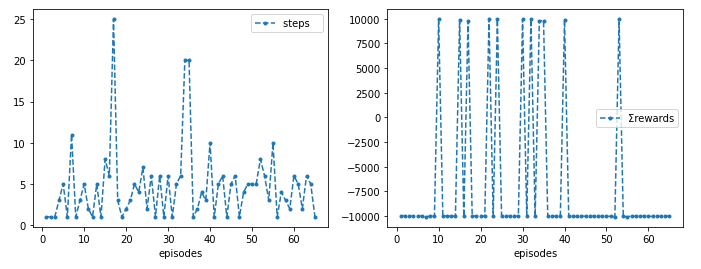

In [26]:
Image('./true_sarsa.png')

Below, you can observe that the robot doesn't head directly towards the goal. This is due to insufficient training. With more training, the robot would have been able to reach the goal directly. However, due to drift and angle tolerance issues, even repeating the same steps doesn't guarantee that the robot will reach the goal.

In [4]:
Video('./true_sarsa.mp4')

### Conclusion and Reflection on what went wrong and what worked well (5) 

- Increasing the step size (i.e., forward movement) to cover half squares proved very successful, but if the step size was too large, the robot would crash into walls. Smaller movements could have been used, but this would have increased the number of states and the time taken for the robot to reach the goal.
- Thanks to this approach, the robot reached the goal quickly, but also failed fast when hitting a wall.
- Continuing the episode after hitting a wall was not desirable, as it was considered a failure, which led the robot to reach the goal faster.
- An angle tolerance of 0.02 was used; decreasing this and reducing the rotation speed could have yielded better results. However, adjusting both of these factors would have increased the time taken to reach the goal.
- Significant jittering/overshoot occurred when the robot attempted to find the angle, causing episodes to take longer due to overshooting/oscillating and the robot searching for the correct angle. Reducing the speed could have addressed this issue, but it would have taken too long to reach the goal. As such, oscillating was preferable to waiting too long.
- In this case, the most crucial aspect was not the tuning of hyperparameters, but the actual movements of the robot to help it reach the goal.
- Additionally, due to the angle not being exactly 0, the robot might turn at an angle, causing it to sometimes hit a wall in one episode and not in another.
- The virtual machine failed multiple times due to the age of the computer (12 years old), with loads reaching 97% and occasional crashes, resulting in the loss of training data.
- Unfortunately, Part 3 was not completed or started due to time constraints related to work and other commitments.